# Bivariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"/></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"/></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.hexbin()</td>
<td>df.plot.bar(stacked=True)</td>
<td>df.plot.line()</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</table>

----

在之前的笔记本中，我们探索了使用pandas来绘制和理解单个列中的关系。 在这个笔记本中，我们将通过查看一次考虑两个变量的图来扩展此视图。

变量之间没有关系的数据是空白画布的数据科学等价物。 要绘制图片，我们需要了解变量如何相互作用。 一个变量的增加是否与另一个变量的增加相关？ 它与其他地方的减少有关吗？ 绘制图片的最佳方法是使用能够实现这些可能性的图表。


In [2]:
import pandas as pd
reviews = pd.read_csv("./input/winemag-data_first150k.csv", index_col=0)
reviews.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

## Scatter plot（散点图）

最简单的二元图是低散点图。 简单的散点图简单地将每个感兴趣的变量映射到二维空间中的点。 这是结果：

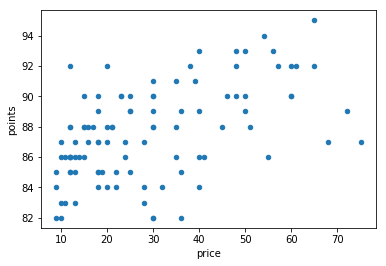

In [8]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

这个图表告诉我们，价格和点数之间存在微弱的相关性：也就是说，更贵的葡萄酒通常会在审核时获得更多积分。

请注意，为了有效地使用此图，我们不得不对数据进行下采样，仅从整个集中获取100个点。 这是因为天真的散点图无法有效地处理映射到同一位置的点。 例如，如果两种葡萄酒（均价值100美元）的评级为90，那么第二种葡萄酒会过量涂在第一种葡萄酒上，我们只会在情节中添加一点。

如果只发生几次，这不是问题。 但是有足够的分数，分布开始看起来像一个无形的斑点，你失去了森林的树木：

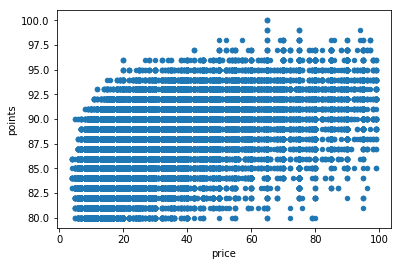

In [9]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

由于它们对过度绘图的弱点，散点图最适用于相对较小的数据集，以及具有大量唯一值的变量。

有几种方法可以处理过度绘图。 我们已经证明了一种方法：对点进行采样。 另一种有趣的方法就是使用我们的下一个绘图类型，一个hexplot。

## Hexplot（十六进制图）
十六进制图将空间中的点聚合为六边形，然后根据其中的值为这些六边形着色：

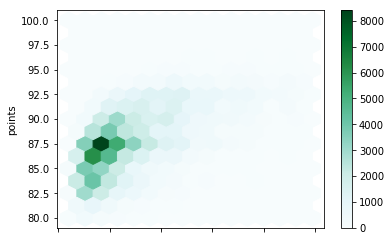

In [10]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

（注意：x轴是price，但由于有一个Bug而从图表中丢失）

该图中的数据与之前的散点图中的数据直接相当，但它告诉我们的故事非常不同。 从这个六角形图中我们可以看到Wine Magazine评论的葡萄酒瓶组大约87.5分和20美元左右。

通过查看散点图我们没有看到这种效果，因为过多的同等价格，类似评分的葡萄酒被过度绘制。 通过消除这个问题，这个hexplot为我们提供了一个更有用的数据集视图。

十六进制图和散点图可以应用于区间变量和/或序数分类变量的组合。

## Stacked plots(堆积图表)

散点图和十六进制图是新的。 但我们也可以使用我们在上一本笔记本中看到的更简单的图表。

修改它们以支持另一个可视变量的最简单方法是使用堆叠。 堆积图表是将变量绘制在另一个之上的图表。

我们将在下一部分中使用五种最常见的葡萄酒的补充选择。

In [11]:
wine_counts = pd.read_csv("./input/top-five-wine-score-counts.csv",
                          index_col=0)

wine_counts计算五种最常评价的葡萄酒每种可能的评价分数的次数：

In [12]:
wine_counts.head()

Bordeaux-style Red Blend  Cabernet Sauvignon  Chardonnay  Pinot Noir  \
points                                                                         
80                           5.0                87.0        68.0        36.0   
81                          18.0               159.0       150.0        83.0   
82                          72.0               435.0       517.0       295.0   
83                          95.0               570.0       669.0       346.0   
84                         268.0               923.0      1146.0       733.0   

        Red Blend  
points             
80           72.0  
81          107.0  
82          223.0  
83          364.0  
84          602.0

许多 pandas 多变量图预计输入数据采用这种格式，列中有一个分类变量，行中有一个分类变量，条目中的交叉点数。

现在让我们看看一些堆积的情节。 我们将从堆积条形图开始。

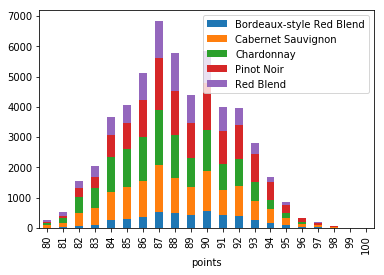

In [15]:
wine_counts.plot.bar(stacked=True)

堆积条形图分享单变量条形图的优点和缺点。 它们最适用于名义分类或小序数分类变量。

另一个简单的例子是区域图，它非常自然地适用于这种形式的操作：

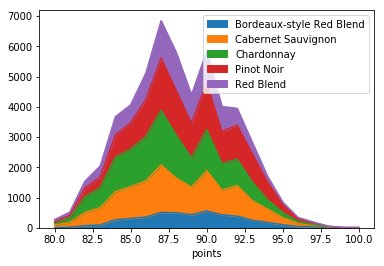

In [16]:
wine_counts.plot.area()

与单变量面积图一样，多变量面积图表用于名义分类或区间变量。

堆积的地块在视觉上非常漂亮。但是，它们有两个主要限制。

第一个限制是堆积图中的第二个变量必须是具有非常有限数量的可能值的变量（可能是序数分类，如此处）。五种不同类型的葡萄酒是一个很好的数字，因为它保持结果可解释;有时会提到八作为建议的上限。许多数据集字段自然不适合这个critereon，所以你必须通过选择一组感兴趣的“make do”。

第二个限制是可解释性。尽管它们很容易制作，并且看起来很漂亮，但是堆积的图形使得很难区分具体的值。例如，看看上面的情节，你能告诉哪一款葡萄酒的得分经常是87分：红色混合物（紫色），黑比诺（红色）或霞多丽（绿色）？实际上真的很难说！

## Bivariate line chart(双变量折线图)

我们已经看到的一种情节类型在制作双变量时仍然是非常有效的是折线图。 由于此图表中的线条占用的视觉空间非常小，因此在同一图表上绘制多条线条非常简单有效。

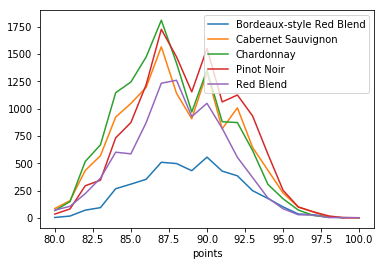

In [17]:
wine_counts.plot.line()

例如，在这张图表中，我们可以很容易地回答上一个例子中的问题：哪种葡萄酒最常得分为87.我们可以看到，绿色的霞多丽以红色勉强击败黑皮诺。


---

# Exercises(练习)

首先，尝试回答以下问题：

1.散点图或十六进制图对两种类型的数据有用吗？
2.在堆积条形图中显示哪种类型的数据是有意义的，但在双变量折线图中却没有？
3.在双变量折线图中显示哪种类型的数据是有意义的，而不是在堆积条形图中显示？
4.假设我们创建一个散点图，但发现由于大量的点很难解释。 我们可以做些什么来解决这个问题？

回答：
1.散点图和十六进制图最好使用序数分类和区间数据的混合。

2.标称分类数据在堆积条形图中是有意义的，但在双变量折线图中则不然。

3.区间数据在双变量折线图中是有意义的，但不是在堆积条形图中。

4.解决此问题的一种方法是对点进行采样。 修复它的另一种方法是使用十六进制图。

In [20]:
pokemon = pd.read_csv("./input/pokemon.csv", index_col=0)
pokemon.head()

against_bug  against_dark  against_dragon  \
abilities                                                                
['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
['Blaze', 'Solar Power']             0.5           1.0             1.0   
['Blaze', 'Solar Power']             0.5           1.0             1.0   

                             against_electric  against_fairy  against_fight  \
abilities                                                                     
['Overgrow', 'Chlorophyll']               0.5            0.5            0.5   
['Overgrow', 'Chlorophyll']               0.5            0.5            0.5   
['Overgrow', 'Chlorophyll']               0.5            0.5            0.5   
['Blaze', 'Solar Power']                  1.0            0.5            1.0   
['Blaze', 'Solar Power']                  1.0            0.5            1.0   

                             against_fire  against_flying  against_ghost  \
abilities                                                                  
['Overgrow', 'Chlorophyll']           2.0             2.0            1.0   
['Overgrow', 'Chlorophyll']           2.0             2.0            1.0   
['Overgrow', 'Chlorophyll']           2.0             2.0            1.0   
['Blaze', 'Solar Power']              0.5             1.0            1.0   
['Blaze', 'Solar Power']              0.5             1.0            1.0   

                             against_grass      ...       percentage_male  \
abilities                                       ...                         
['Overgrow', 'Chlorophyll']           0.25      ...                  88.1   
['Overgrow', 'Chlorophyll']           0.25      ...                  88.1   
['Overgrow', 'Chlorophyll']           0.25      ...                  88.1   
['Blaze', 'Solar Power']              0.50      ...                  88.1   
['Blaze', 'Solar Power']              0.50      ...                  88.1   

                             pokedex_number  sp_attack  sp_defense  speed  \
abilities                                                                   
['Overgrow', 'Chlorophyll']               1         65          65     45   
['Overgrow', 'Chlorophyll']               2         80          80     60   
['Overgrow', 'Chlorophyll']               3        122         120     80   
['Blaze', 'Solar Power']                  4         60          50     65   
['Blaze', 'Solar Power']                  5         80          65     80   

                             type1   type2  weight_kg  generation  \
abilities                                                           
['Overgrow', 'Chlorophyll']  grass  poison        6.9           1   
['Overgrow', 'Chlorophyll']  grass  poison       13.0           1   
['Overgrow', 'Chlorophyll']  grass  poison      100.0           1   
['Blaze', 'Solar Power']      fire     NaN        8.5           1   
['Blaze', 'Solar Power']      fire     NaN       19.0           1   

                             is_legendary  
abilities                                  
['Overgrow', 'Chlorophyll']             0  
['Overgrow', 'Chlorophyll']             0  
['Overgrow', 'Chlorophyll']             0  
['Blaze', 'Solar Power']                0  
['Blaze', 'Solar Power']                0  

[5 rows x 40 columns]

In [21]:
pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

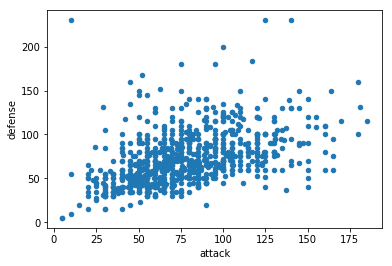

In [23]:
pokemon.plot.scatter(x='attack',y='defense')

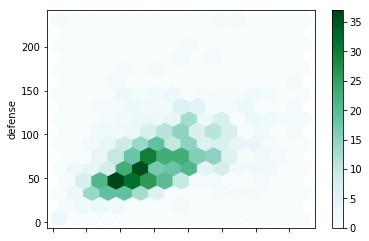

In [29]:
pokemon.plot.hexbin(x='attack',y='defense',gridsize=15)

In [34]:
pokemon_stats_legendary = pokemon.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]

In [35]:
pokemon_stats_legendary

attack     defense
is_legendary generation                        
0            1            73.486301   69.431507
             2            68.095745   70.042553
             3            74.080000   68.768000
             4            79.234043   72.382979
             5            77.608392   70.000000
             6            71.484848   71.136364
             7            80.238095   74.539683
1            1           105.000000   89.000000
             2            99.166667   99.166667
             3           116.000000  121.000000
             4           107.538462  103.538462
             5           113.000000   93.538462
             6           132.000000  100.166667
             7           100.941176   90.882353

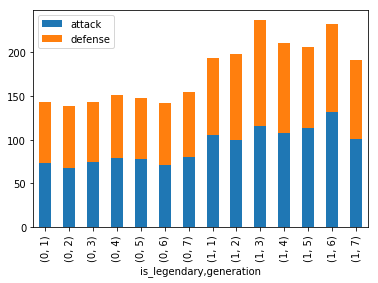

In [36]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [40]:
pokemon_stats_by_generation = pokemon.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

In [41]:
pokemon_stats_by_generation

hp     attack    defense  sp_attack  sp_defense      speed
generation                                                                   
1           64.344371  74.529801  70.079470  69.403974   67.741722  70.152318
2           70.980000  69.960000  71.790000  65.400000   73.440000  61.610000
3           65.666667  77.185185  72.637037  71.562963   69.392593  63.577778
4           73.102804  82.672897  76.168224  74.635514   74.523364  70.074766
5           70.314103  80.557692  71.961538  69.974359   67.711538  66.519231
6           71.111111  76.527778  73.555556  76.569444   73.194444  66.652778
7           70.575000  84.637500  78.012500  75.250000   75.650000  64.037500

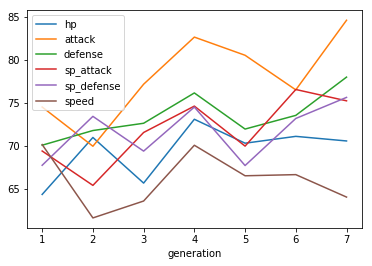

In [42]:
pokemon_stats_by_generation.plot.line()